## Loading the dataset.

In [1]:
# Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stat
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Feature Description

In [3]:
df.shape

(8124, 23)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

## Verifying the missing values

In [5]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Pre-Processing

In [6]:
from sklearn.preprocessing import LabelEncoder
df = df.apply(LabelEncoder().fit_transform)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


## Splitting the dataset

In [7]:
# define independent and dependent variable
x=df.drop(['class'], axis=1)
y=pd.DataFrame(df['class'])

In [8]:
# split the dataset into training and test set 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.2, random_state=42)

In [9]:
x_train.shape

(6499, 22)

In [10]:
y_train.shape

(6499, 1)

In [11]:
x_test.shape

(1625, 22)

In [12]:
y_test.shape

(1625, 1)

## Build the model and perform Evaluation

### a) Logistic Regression Model

In [13]:
from sklearn.linear_model import LogisticRegression
logistic_model=LogisticRegression()
logistic_model.fit(x_train,y_train)
y_pred=logistic_model.predict(x_test)

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='micro'))
print("Recall is:",recall_score(y_test,y_pred,average='micro'))
print("F1 score is:",f1_score(y_test,y_pred,average='micro'))

Accuracy is: 0.9476923076923077
Precision is: 0.9476923076923077
Recall is: 0.9476923076923077
F1 score is: 0.9476923076923076


### b) KNN Model

In [14]:
from sklearn.neighbors import KNeighborsClassifier
accuracy_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(x_train,y_train)
    y_pred=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred)
    accuracy_values.append(acc)

Text(0, 0.5, 'accuracy')

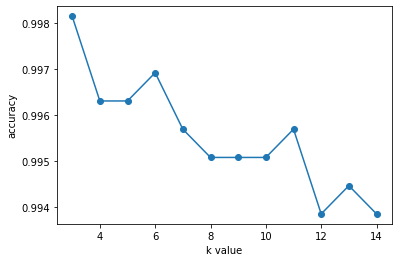

In [15]:
plt.plot(neighbors,accuracy_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

### KNN Model (with k=3)

In [16]:
# From the above plot it is clear that for k=3, the accuracy is best.
classifier=KNeighborsClassifier(n_neighbors=3,metric='minkowski')
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='micro'))
print("Recall is:",recall_score(y_test,y_pred,average='micro'))
print("F1 score is:",f1_score(y_test,y_pred,average='micro'))

Accuracy is: 0.9981538461538462
Precision is: 0.9981538461538462
Recall is: 0.9981538461538462
F1 score is: 0.9981538461538462


### c) Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='micro'))
print("Recall is:",recall_score(y_test,y_pred,average='micro'))
print("F1 score is:",f1_score(y_test,y_pred,average='micro'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 score is: 1.0


In [18]:
confusion_matrix(y_test,y_pred)

array([[843,   0],
       [  0, 782]], dtype=int64)

### d) Linear SVM

In [19]:
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
y_pred=svm_linear.predict(x_test)

print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='micro'))
print("Recall is:",recall_score(y_test,y_pred,average='micro'))
print("F1 score is:",f1_score(y_test,y_pred,average='micro'))

Accuracy is: 0.9729230769230769
Precision is: 0.9729230769230769
Recall is: 0.9729230769230769
F1 score is: 0.9729230769230769


### Polynomial SVM

In [20]:
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(x_train,y_train)
y_pred=svm_poly.predict(x_test)

print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='micro'))
print("Recall is:",recall_score(y_test,y_pred,average='micro'))
print("F1 score is:",f1_score(y_test,y_pred,average='micro'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 score is: 1.0


In [21]:
confusion_matrix(y_test,y_pred)

array([[843,   0],
       [  0, 782]], dtype=int64)

### Radial SVM

In [22]:
svm_radial=SVC(kernel='rbf')
svm_radial.fit(x_train,y_train)
y_pred=svm_radial.predict(x_test)

print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='micro'))
print("Recall is:",recall_score(y_test,y_pred,average='micro'))
print("F1 score is:",f1_score(y_test,y_pred,average='micro'))

Accuracy is: 0.9926153846153846
Precision is: 0.9926153846153846
Recall is: 0.9926153846153846
F1 score is: 0.9926153846153846


### e) RandomForest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf= RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

print("Accuracy is:",accuracy_score(y_test,y_pred))
print("Precision is:",precision_score(y_test,y_pred,average='micro'))
print("Recall is:",recall_score(y_test,y_pred,average='micro'))
print("F1 score is:",f1_score(y_test,y_pred,average='micro'))

Accuracy is: 1.0
Precision is: 1.0
Recall is: 1.0
F1 score is: 1.0


In [24]:
confusion_matrix(y_test,y_pred)

array([[843,   0],
       [  0, 782]], dtype=int64)

### f) Naive Bayes Classifier

In [25]:
#fitting gaussian naive bayes to the training set
from sklearn.naive_bayes import GaussianNB
Gclassifier=GaussianNB()
Gclassifier.fit(x_train,y_train)
y_pred=Gclassifier.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.9218461538461539


In [26]:
#fitting gaussian naive bayes to the training set
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(x_train,y_train)
y_pred=classifier.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.8073846153846154


In [27]:
#fitting bernoulli naive bayes to the training set
from sklearn.naive_bayes import BernoulliNB
Bclassifier=BernoulliNB()
Bclassifier.fit(x_train,y_train)
y_pred=Bclassifier.predict(x_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print('Accuracy is:',accuracy_score(y_test,y_pred))

Accuracy is: 0.8418461538461538


### From the model evaluation it is clear that to predict if the Mushroom is edible or poisonous,we can choose DecisionTree Classifier,Polynomial SVM or RandomForest Classifier. All these three models are giving the same accuracy value of 1.0